# **Clasificación Naive Bayes**

#### Integrantes
- *Santiago Cassiano Rozo*
- *Fabian Camilo Castro Lozano*
- *David Jose Leon Aroca*

#Acceso a librerias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#Acceso a los datasets desde google drive

Acceso a los datasets en google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#0. Lectura de los datos para los algoritmos de clasificación.

Leemos el dataset numerico que generamos en la fase de preprocesamiento.

In [ ]:
df= pd.read_csv("/content/gdrive/Shareddrives/Minería de datos/Proyecto/I. Dataset/numerico.csv", sep=",")

df

,Unnamed: 0,age,education,default,balance,housing,loan,contact,day,month,...,services,student,technician,unemployed,divorced,married,single,failure,other,success
0,0,58,3,0,2143,1,0,0,5,5,...,0,0,0,0,0,1,0,1,0,0
1,1,44,2,0,29,1,0,0,5,5,...,0,0,1,0,0,0,1,1,0,0
2,2,33,2,0,2,1,1,0,5,5,...,0,0,0,0,0,1,0,1,0,0
3,3,47,2,0,1506,1,0,0,5,5,...,0,0,0,0,0,1,0,1,0,0
4,4,33,2,0,1,0,0,0,5,5,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41085,41085,23,3,0,113,0,0,0,17,11,...,0,1,0,0,0,0,1,1,0,0
41086,41086,25,2,0,505,0,1,0,17,11,...,0,0,1,0,0,0,1,1,0,0
41087,41087,51,3,0,825,0,0,0,17,11,...,0,0,1,0,0,1,0,1,0,0
41088,41088,71,1,0,1729,0,0,0,17,11,...,0,0,0,0,1,0,0,1,0,0


from matplotlib import pyplot as plt
df['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['education'].plot(kind='hist', bins=20, title='education')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['default'].plot(kind='hist', bins=20, title='default')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Unnamed: 0', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='education', y='default', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='default', y='balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['education']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('education')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['default']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('default')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['balance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('balance')

from matplotlib import pyplot as plt
df['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['education'].plot(kind='line', figsize=(8, 4), title='education')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['default'].plot(kind='line', figsize=(8, 4), title='default')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Suponiendo que 'df' es tu DataFrame y 'columna_a_eliminar' es la columna que quieres eliminar
df = df.drop('duration', axis=1)

#1. Preparación de los datos para el algoritmo de clasificación.

In [ ]:
# Codificar la variable 'y' ('yes'/'no') a valores numéricos (0 y 1)
encoder = LabelEncoder()
df['y_encoded'] = encoder.fit_transform(df['y'])

# Dividir el dataset en conjuntos de entrenamiento y prueba
X = df.drop(['y', 'y_encoded'], axis=1)  # Variables predictoras
y = df['y_encoded']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

En este paso se hace una codificación del atributo "y" para darles valores numéricos con el fin de poder aplicar el algoritmo de clasificación y se divide el dataset en dos conjuntos que son el de entrenamiento y el de prueba en 70% y 30% respectivamente.

#2. Aplicación del algoritmo de clasificación y rendimiento del modelo.

In [ ]:
# Crear una instancia del clasificador Naive Bayes
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print(metrics.classification_report(y_test, predictions))

Accuracy: 0.8642816581487791
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     11068
           1       0.32      0.29      0.30      1259

    accuracy                           0.86     12327
   macro avg       0.62      0.61      0.61     12327
weighted avg       0.86      0.86      0.86     12327



En esta parte del notebook se crea la instancia del clasificador del algoritmo Naive Bayes para luego entrenar el modelo y realizar las respectivas predicciones. Hecho esto se pasa a evaluar el rendimiento del modelo con la parte del dataset destinada para la prueba.

Los resultados de rendimiento son buenos para la clasificación de las instancias negativas (para el modelo 0 equivale a "no") con una precisión de 94%, mientras que para las instancias positivas (para el modelo 1 equivale a "yes") lo que nos hace suponer que la clasificación se hace de manera inadecuada al tratar un dataset desbalanceado.

#3. Función para la visualización de la matriz de confusión.

In [ ]:
#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred)
    #classes = classes[unique_labels(y_true, y_pred)]

    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest')
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


Se usa la definición de la función para visualizar la matriz de confusión de una manera más gráfica y organizada.

#4. Visualización de la matriz de confusión y curva ROC.

Se imprime la matriz de Confusión


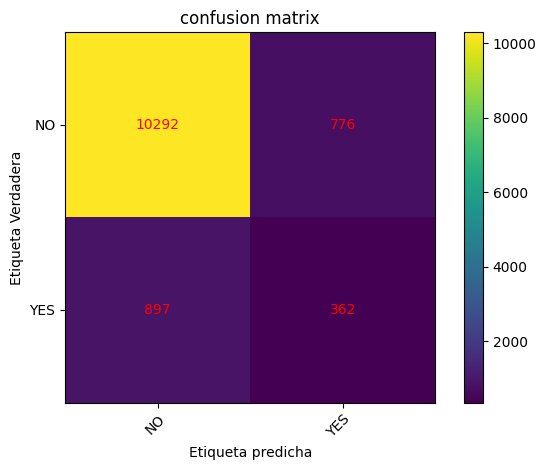

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[10292   776]
 [  897   362]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     11068
           1       0.32      0.29      0.30      1259

    accuracy                           0.86     12327
   macro avg       0.62      0.61      0.61     12327
weighted avg       0.86      0.86      0.86     12327



In [ ]:
np.set_printoptions(precision=2)
y_test = list(map(int, y_test))
predictions = list(map(int, predictions))

class_names = ['NO', 'YES']
cm = confusion_matrix(y_test, predictions)

plot_confusion_matrix(y_test, predictions, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, digits=2))

Efectivamente la gráfica de la matriz de confusión nos muestra cómo el algoritmo de Naive Bayes tiende a clasificar en una sola clase, pero debemos descartar la opción de que estos resultados se den porque el dataset está desbalanceado.

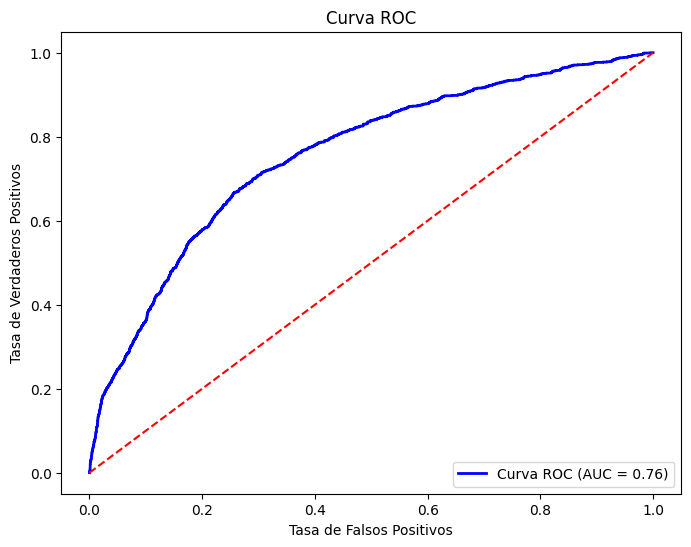

In [ ]:
# Realizar predicciones de probabilidad
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

La curva ROC del resultado es buena para el modelo, pues el AUC es de 0.87 lo que podría considerarse una buena probabilidad de que cada instancia positiva sea clasificada correctamente, aunque desconoce los resultados para las instancias negativas.

#5. Balanceo del dataset con Submuestreo.

En esta parte, debido a los resultados observados anteriormente, buscamos hacer un balanceo del dataset son submuestreo aleatorio para descartar la posibilidad de que la clasificación erronea de las instancias negativas se deba a eso

In [ ]:
# Crear el objeto de submuestreo
undersample = RandomUnderSampler(random_state=42)

# Aplicar el submuestreo a tu DataFrame
X_under, y_under = undersample.fit_resample(df.drop(columns=['y', 'y_encoded']), df['y_encoded'])


En este submuestreo se toman 4102 instancias negativas aleatoriamente para igualar la cantidad de instancias positivas y luego aplicar el algoritmo Naive Bayes.

#6. Preparación de los datos para el algoritmo de clasificación.

Dividimos la muestra en datos de entrenamiento y datos de prueba.

In [ ]:
# Dividir el dataset submuestreado en conjuntos de entrenamiento y prueba
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

#7. Aplicación del algoritmo de clasificación y rendimiento del modelo.

aplicamos el algoritmo creando el clasificador Naive Bayes, entrenandolo y realizando las predicciones para ese conjunto de entrenamiento.

In [ ]:
# Crear una instancia del clasificador Naive Bayes
model_under = GaussianNB()

# Entrenar el modelo
model_under.fit(X_train_under, y_train_under)

# Realizar predicciones
predictions_under = model_under.predict(X_test_under)

# Evaluar el rendimiento del modelo
accuracy_under = metrics.accuracy_score(y_test_under, predictions_under)
print("Accuracy:", accuracy_under)
print(metrics.classification_report(y_test_under, predictions_under))


Accuracy: 0.6974004874086109
              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1234
           1       0.76      0.57      0.65      1228

    accuracy                           0.70      2462
   macro avg       0.71      0.70      0.69      2462
weighted avg       0.71      0.70      0.69      2462



Al observar la evaluación del rendimiento del modelo se tiene que la precisión para la clasificación de las instancias negativas disminuyó a 74%, pero la clasificación de las instancias positivas aumentó a 81% que para fines de la clasificación se consideran resultados buenos y balanceados para ambas clases.

#8. Visualización de la matriz de confusión y curva ROC.

Se imprime la matriz de Confusión


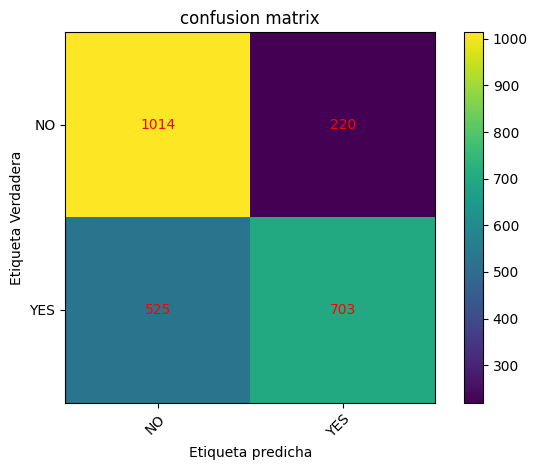

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[1014  220]
 [ 525  703]]
              precision    recall  f1-score   support

           0      0.659     0.822     0.731      1234
           1      0.762     0.572     0.654      1228

    accuracy                          0.697      2462
   macro avg      0.710     0.697     0.692      2462
weighted avg      0.710     0.697     0.693      2462



In [ ]:
np.set_printoptions(precision=2)
y_test_under = list(map(int, y_test_under))
predictions_under = list(map(int, predictions_under))

class_names = ['NO', 'YES']
cm = confusion_matrix(y_test_under, predictions_under)

plot_confusion_matrix(y_test_under, predictions_under, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test_under, predictions_under, digits=3))

En esta visualización de la matriz de confusión se reafirma que los resultados son mejores que los del dataset desbalanceados y en términos generales son buenos resultados para el modelo de clasificación, a pesar de que no sean resultados óptimos.

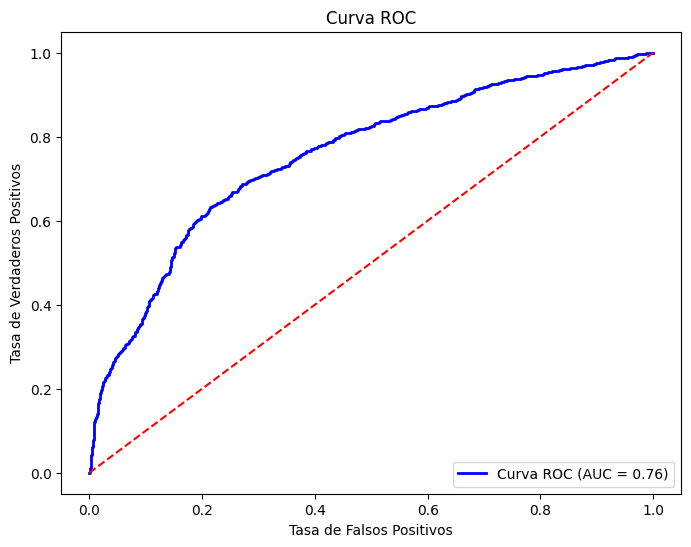

In [ ]:
# Realizar predicciones de probabilidad
y_prob_under = model.predict_proba(X_test_under)[:, 1]  # Probabilidad de clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_under, y_prob_under)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Observando la curva de ROC el AUC sigue siendo de 0.87 que es un valor cercano a 1 y por lo tanto es bueno para nuestro modelo de clasificación después de balancear el dataset.

In [ ]:
# Extrae los valores de la matriz de confusión
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos

# Calcula la especificidad
specificity = TN / (TN + FP)

print("Especificidad:", specificity)

Especificidad: 0.8217179902755267
